<a href="https://colab.research.google.com/github/iued-uni-heidelberg/DAAD-Training-2021/blob/main/session00introduction_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading / uploading a text corpus

## Homework task: creating frequency dictionary of multiword expressions

Further sections have been modified to create a dictionary of MWEs (N-word long)

## George Orwell, 1984 novel: 
https://heibox.uni-heidelberg.de/d/d65daff8341e467c82b1/

(texts in en, de, fr, es, it. You can search for a freely-available text in your own language).

## Wikipedia corpus
This site contains plain text versions of the Wikipedia:
https://lindat.mff.cuni.cz/repository/xmlui/handle/11234/1-2735#

You can download the version for your favourite language(s).

1. Download the "1984" novel into your local drive
2. Upload it onto the Colab file system:
- *Files* button to the left 
- *Upload to Session storage* button
3. Examine the file on Colab
4. Write a command to download it onto your system automatically: tip -- google "wget" and use it in Colab



In [9]:
# example for downloading files for different languages, e.g., German file in  from the https://heibox.uni-heidelberg.de/f/ea06aa47fe2d49959a62/
# remove / insert comments to choose the language you want to work with

# German
!wget https://heibox.uni-heidelberg.de/f/ea06aa47fe2d49959a62/?dl=1

# Armenian
# !wget https://heibox.uni-heidelberg.de/f/3255f672ff7b4190828a/?dl=1

# Georgian
# !wget https://heibox.uni-heidelberg.de/f/318b32556cdc44d38238/?dl=1

# French
# !wget https://heibox.uni-heidelberg.de/f/b0cc03fbdb6248cab544/?dl=1

# Spanish
# !wget https://heibox.uni-heidelberg.de/f/585ee5e9eb3548219c34/?dl=1

# Italian
# !wget https://heibox.uni-heidelberg.de/f/fe1ae20b08b240f3a4f0/?dl=1

# English
# !wget https://heibox.uni-heidelberg.de/f/00ee04d9b9544c298be7/?dl=1

# Georgian 'Brown corpus'
# !wget https://heibox.uni-heidelberg.de/f/d5603814da69440aadf4/?dl=1

# English Brown corpus (text)
# !wget https://heibox.uni-heidelberg.de/f/d2c3543b757d49839ac8/?dl=1


# renaming file
!mv index.html?dl=1 go1984.txt

--2021-09-02 07:40:59--  https://heibox.uni-heidelberg.de/f/ea06aa47fe2d49959a62/?dl=1
Resolving heibox.uni-heidelberg.de (heibox.uni-heidelberg.de)... 129.206.7.113
Connecting to heibox.uni-heidelberg.de (heibox.uni-heidelberg.de)|129.206.7.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://heibox.uni-heidelberg.de/seafhttp/files/c9b0fe4b-3004-4bcb-a46d-78ad6c4b2a16/go1984de.txt [following]
--2021-09-02 07:41:00--  https://heibox.uni-heidelberg.de/seafhttp/files/c9b0fe4b-3004-4bcb-a46d-78ad6c4b2a16/go1984de.txt
Reusing existing connection to heibox.uni-heidelberg.de:443.
HTTP request sent, awaiting response... 200 OK
Length: 691228 (675K) [text/plain]
Saving to: ‘index.html?dl=1’

index.html?dl=1     100%[===================>] 675.03K   605KB/s    in 1.1s    

2021-09-02 07:41:01 (605 KB/s) - ‘index.html?dl=1’ saved [691228/691228]



Now let's make a frequency dictionary from our file!

In [10]:
# step 1: importing standard Python libraries
import sys, re, os
import scipy.stats as ss
import matplotlib.pyplot as plt
import math
import csv

In [95]:
# step 2: open your file for reading (change the name of the file for a different language / corpus)
# FileInput = open("go1984en.txt",'r')
FileInput = open("go1984.txt",'r')
# open another file for writing (our output file)
FileOutput = open("go1984-frq.txt", 'w')

In [96]:
# step 3: create an empty frequency dictionary: words will be 'keys', frequencies will be 'values'
DictionaryFrq = {}

In [97]:
List = ['The', 'fairest', 'votary', 'took', 'up', 'that', 'fire', 'William', 'Shakespeare']
List1 = []

for i in range(1,4):
    print(i)
    if i == 1:
        List1.extend(List[3*i-1 ::-1])
        print(List[3*i-1::-1])
    else:
        print(List[3*i-1:3*i-4:-1])
        List1.extend(List[3*i-1:3*i-4:-1])
print(List1)


1
['votary', 'fairest', 'The']
2
['that', 'up', 'took']
3
['Shakespeare', 'William', 'fire']
['votary', 'fairest', 'The', 'that', 'up', 'took', 'Shakespeare', 'William', 'fire']


In [98]:
# step 4: read each line, clean it up, split it into words and count unique words:
INGram = 3
for Line in FileInput:
    Line = re.sub('<.*?>', '', Line) # remove html/xml tags
    Line = Line.lower() # convert to lower case
    Line = Line.strip() # remove leading and final white spaces
    ListOfWords = re.split('[ ,\.:;\!\(\)\"\[\]«»\-\?]+', Line) # tokenize: split on white spaces and punctuation
    # sys.stdout.write( str( ListOfWords ) + '\n' )

    # If word exists, add 1 to its existing frequency; if it doesn't, then set frequency to 1
    # { word1 : 4 , word2 : 4, word3 : 2 }
    # -- homework -- how to do MWEs
    # we use list slices: 
    # a[start:stop]
    # 
    # for Word in ListOfWords:
    for i in range(len(ListOfWords) - INGram):
        # Word = ListOfWords[i]
        Words = ListOfWords[i:i+INGram]
        # if len(Words) < INGram: continue
        SWords = ' '.join(Words)
        if Word:
            try:
                DictionaryFrq[SWords] = DictionaryFrq[SWords] + 1
            except:
                DictionaryFrq[SWords] = 1

In [99]:
# step 5: save the frequency dictionary into file, by decreasing frequencies
# FileOutput.write( str( DictionaryFrq ) + '\n' )
for Word, Frq in sorted( DictionaryFrq.items() , key=lambda x: x[1], reverse=True) :
    FileOutput.write(Word + '\t' + str(Frq) + '\n')
FileOutput.flush()

## Tasks
1. Examine the frequencies file; 
2. download it onto your local machine; 
3. Change the programme to create a frequency dictionary from another file / corpus / language
4. Change the programme to preserve lower/upper-case letters; how would you print out only words with frequency >1 ?
5. Run it again and compare the results (save the results in another file).


In [100]:
LRanks = []
LFrqs = []
LCoef = []
rank = 0
for Word, Frq in sorted(DictionaryFrq.items() , key=lambda x: x[1], reverse=True):
    rank +=1
    coef = rank * Frq
    LRanks.append(rank)
    LFrqs.append(Frq)
    LCoef.append(coef)

print(len(LRanks))
print(len(LFrqs))
print(len(LCoef))

90272
90272
90272


Let's plot rank vs. frequency
(cf. our coefficient), scaled by log

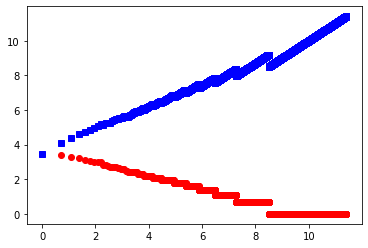

In [101]:
plt.plot([math.log(c) for c in LRanks], [math.log(c) for c in LFrqs], 'ro')
plt.plot([math.log(c) for c in LRanks], [math.log(c) for c in LCoef], 'bs')
# plt.plot([c for c in LRanks], [c for c in LFrqs], 'bs')
